# CIFAR-10 을 이용한 CNN 구축

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# CIFAR-10 데이터셋 로드 (훈련/테스트 데이터 자동 분리)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step 


In [3]:
# CIFAR-10 데이터셋의 입력 이미지와 레이블의 형태 출력
print(X_train.shape)  # (50000, 32, 32, 3) → 훈련용 이미지 5만 개 (32x32 RGB)
print(X_test.shape)   # (10000, 32, 32, 3) → 테스트용 이미지 1만 개
print(y_train.shape)  # (50000, 1) → 훈련용 레이블 (정수 0~9)
print(y_test.shape)   # (10000, 1) → 테스트용 레이블

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
# CIFAR-10 데이터셋의 클래스 이름을 리스트로 정의
cifa10_classes = [
    'airplane',    # 0
    'automobile',  # 1
    'bird',        # 2
    'cat',         # 3
    'deer',        # 4
    'dog',         # 5
    'frog',        # 6
    'horse',       # 7
    'ship',        # 8
    'truck'        # 9
]

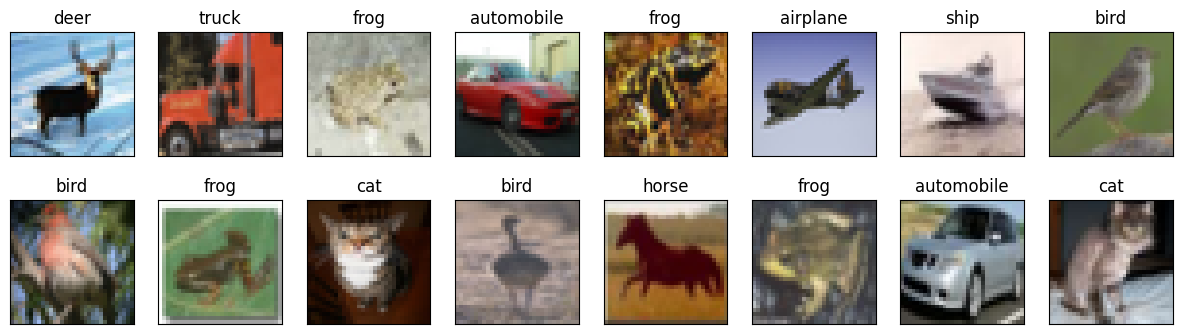

In [5]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))  # 2행 8열의 서브플롯 생성
axes = axes.ravel()  # 2차원 배열을 1차원으로 평탄화하여 반복문에서 인덱스로 접근 가능하게 함

for i in range(16):
    idx = np.random.randint(0, len(y_train))  # 무작위로 인덱스 선택
    axes[i].imshow(X_train[idx, :])           # 해당 인덱스의 이미지를 출력
    axes[i].set_xticks([])                    # x축 눈금 제거
    axes[i].set_yticks([])                    # y축 눈금 제거
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])  # 클래스 이름을 제목으로 표시

In [6]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

In [7]:
# 클래스 레이블(정수형)을 One-hot 인코딩 형식으로 변환
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)

# 변환된 레이블의 shape 확인
print(y_train_onehot.shape)  # (50000, 10)
print(y_test_onehot.shape)   # (10000, 10)

(50000, 10)
(10000, 10)


In [10]:
# 훈련 데이터를 TensorFlow Dataset 형식으로 변환
# 데이터를 섞고(shuffle), 배치 단위로 나눔 (64개씩)
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)

# 테스트 데이터도 Dataset으로 변환 (배치 처리만 수행, 섞지 않음)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

In [15]:
model = Sequential()

# 입력층: 32x32 크기의 RGB 이미지
model.add(Input(shape=(32, 32, 3)))

# 첫 번째 합성곱 블록
model.add(Conv2D(16, (3, 3), padding='same'))  # 3x3 필터 16개
model.add(Activation('relu'))                  # 활성화 함수: ReLU
model.add(MaxPooling2D((2,2)))                 # 2x2 최대 풀링
model.add(Dropout(0.2))                        # 과적합 방지용 Dropout

# 두 번째 합성곱 블록
model.add(Conv2D(32, (3, 3), padding='same'))  # 3x3 필터 32개
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# 세 번째 합성곱 블록
model.add(Conv2D(64, (3, 3), padding='same'))  # 3x3 필터 64개
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# 완전 연결층 (FC)
model.add(Flatten())                          # feature map → 1D 벡터
model.add(Dense(256, activation='relu'))      # 은닉층 256개 노드
model.add(Dropout(0.5))                       # 더 강한 정규화

# 출력층
model.add(Dense(10, activation='softmax'))    # 10개 클래스에 대한 확률 출력

In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,554 (1.10 MB)

 Trainable params: 288,554 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 모델 컴파일: 손실 함수, 옵티마이저, 평가 지표 설정
model.compile(
    loss='categorical_crossentropy',   # 다중 클래스 분류에 적합한 손실 함수 (One-hot 인코딩 사용 시)
    optimizer=Adam(learning_rate=0.001),          # Adam 옵티마이저, 학습률(learning rate) 0.001로 설정
    metrics=['accuracy']               # 모델 성능 지표: 정확도
)

In [18]:
# 모델 학습 시작
model.fit(
    train_ds,                 # 훈련 데이터셋 (tf.data.Dataset 형식)
    epochs=5,                 # 전체 데이터를 5회 반복 학습
    validation_data=test_ds,  # 검증 데이터셋으로 성능 확인
    verbose=1,                # 학습 과정 출력 (1: 자세히 출력)
    shuffle=True              # 데이터 셔플 여부 (주의: tf.data에서는 무시될 수 있음)
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2812 - loss: 1.9307 - val_accuracy: 0.4923 - val_loss: 1.4233
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4804 - loss: 1.4347 - val_accuracy: 0.5770 - val_loss: 1.1864
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5449 - loss: 1.2740 - val_accuracy: 0.6120 - val_loss: 1.0887
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5829 - loss: 1.1811 - val_accuracy: 0.6369 - val_loss: 1.0106
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6028 - loss: 1.1197 - val_accuracy: 0.6679 - val_loss: 0.9588


In [19]:
# 테스트 데이터셋을 사용해 모델 성능 평가
# verbose=0 → 출력 없이 조용히 실행
model.evaluate(test_ds, verbose=0)

[0.9587569236755371, 0.667900025844574]

In [20]:
# 테스트 이미지에 대해 예측 수행
# model.predict()는 각 클래스에 대한 확률 벡터를 반환 → shape: (10000, 10)
# .argmax(axis=-1) → 가장 확률이 높은 클래스(0~9)를 선택
y_pred = model.predict(X_test_scaled).argmax(axis=-1)

# 예측 결과의 shape 및 내용 확인
print(y_pred.shape)  # (10000,) → 각 이미지에 대한 예측 클래스
print(y_pred)        # 예: [3 8 1 0 6 ...]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
(10000,)
[3 8 8 ... 5 1 7]


In [21]:
# y_test는 (10000, 1) 형태의 2차원 배열이므로
# .ravel()을 통해 1차원 벡터로 변환 → (10000,)
y_true = y_test.ravel()

# 변환된 실제 정답 레이블 확인
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

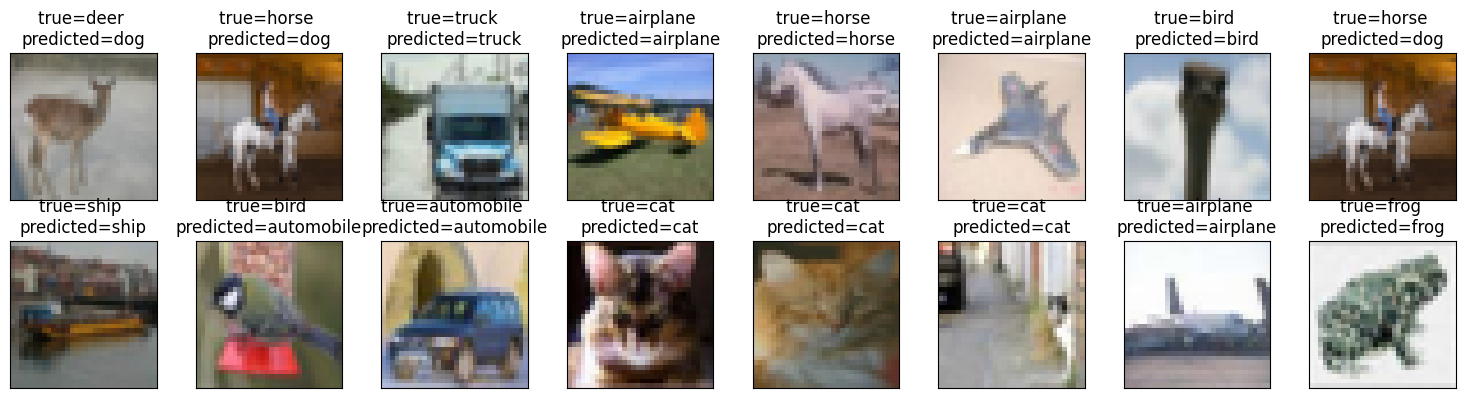

In [22]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()

# 16개의 무작위 이미지를 선택하여 표시
for i in range(16):
    idx = np.random.randint(0, len(y_test))  # 무작위 인덱스 생성
    axes[i].imshow(X_test[idx, :])      # 이미지 표시
    axes[i].set_xticks([])                    # x축 눈금 제거
    axes[i].set_yticks([])                    # y축 눈금 제거
    # 실제 라벨과 예측된 라벨로 제목 설정
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))

plt.tight_layout() # 서브플롯들이 겹치지 않도록 레이아웃 조정
plt.show() 

## accuracy 시각화

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# 예측값(y_pred)과 실제값(y_true)을 비교하여 혼동 행렬 생성
cm = confusion_matrix(y_true, y_pred)
cm

array([[671,  15,  59,  42,  10,   5,  17,   9, 136,  36],
       [ 15, 809,   6,  15,   2,   5,  13,   2,  47,  86],
       [ 61,   7, 534, 110,  90,  80,  69,  22,  20,   7],
       [ 11,  12,  67, 546,  50, 169,  93,  26,  12,  14],
       [ 20,   2, 116, 101, 537,  41,  98,  70,  12,   3],
       [  9,   1,  57, 240,  42, 560,  37,  38,  10,   6],
       [  4,   7,  49,  75,  31,  16, 803,   4,   9,   2],
       [  9,   2,  42,  79,  75, 101,  12, 658,   5,  17],
       [ 41,  22,  11,  33,   5,   5,  11,   4, 853,  15],
       [ 27, 129,   8,  27,   8,   7,  17,  16,  53, 708]])

### heatmap 작성

Test Accuracy : 0.6679


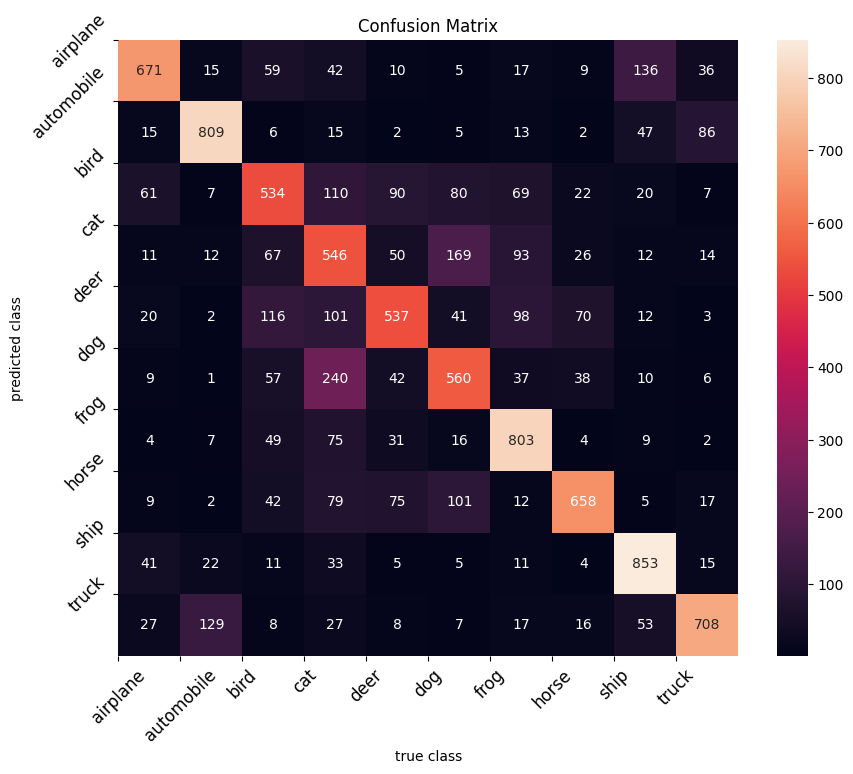

In [24]:
plt.figure(figsize=(10, 8))  # 전체 그래프 크기 설정

# 혼동 행렬을 히트맵으로 시각화 (정수로 표시)
sns.heatmap(cm, annot=True, fmt='d')

# x축, y축 눈금에 클래스 이름 표시 + 회전 각도와 글자 크기 조정
plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)

# 축 라벨 및 제목 설정
plt.xlabel("true class")       # 실제 클래스 (y_true)
plt.ylabel("predicted class")  # 예측 클래스 (y_pred)
plt.title('Confusion Matrix')  # 그래프 제목

# 정확도 출력
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교